
# Project: Data analysis for medical appointments in Bazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitation">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Missing medical appointments could not only pose health risks for patients but also create a huge waste in healthcare resources. However, the no-show rates can be as high as 30%. Why these happen? This project is trying to find out the important factors behind by analysing the dataset which included the information of 100k medical appointments as well as characteristics about the patients in Brazil. 
>
> The following questions will be explored in this report:
>
> (1) What is the mean show-up rate?  

> (2) Does gender has influence on the attendance of patients?
  
> (3) Are patients more willing to go to the appointment that is scheduled in the near future?

> (4) Does SMS motivate patients to attend medical appointments?

> (5) Does patient have any preference on the day of week?

> (6) What's the difference between show-up rate for patient at different age?

> (7) Does welfare play an important role on the attendance?

> (8) How is the health status for patients who did not show-up at medical appointments? 

> (9) Where is the most popular neighborhood for attending medical appointments? 

> (10) What is the record period of the dataset?

In [1]:
# import the packages 
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set_style('darkgrid')
# pd.set_option('display.max_rows', 110530)

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load the data and print out a few lines
df_ma = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_ma.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# check the size of the dataset
df_ma.shape

(110527, 14)

In [4]:
# check for duplicates in the data
sum(df_ma.duplicated())

0

There are no duplicates in this dataset.

In [5]:
# check are there any NULL values
df_ma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no NULL values in this dataset.

In [6]:
# check the data type for ScheduledDay
type(df_ma['ScheduledDay'][0])

str

In [7]:
# check the data type for AppointmentDay
type(df_ma['AppointmentDay'][0])

str

The original data type for ScheduledDay and AppointmentDay is string, it would be more convenient to analyse these variables if their data type is converted to datetime. Data type conversion will be performed in the second part of this section.

In [8]:
# check the descriptive statistics
df_ma.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


It shows that age of the youngest patient is -1, which suggest that there are some erroneous values in the Age column. 

Let's check the values in the Age column in more detail.

In [9]:
df_ma['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

There are patients with age of -1, 0, and above 100. People older than 100 year-old are quite rare, but it is possible. The oldest person in the world is a 117-year-old Japanese woman according to the CBS News. So the data for patients with age above 100 can be kept. However, patients with age of -1 and 0 are not possible, and these data will be dropped in the second part of this section.  


### Feature Engineering and Data Cleaning

In [10]:
# drop the data of patient with age equal to -1
df_ma.drop(index = df_ma[df_ma.Age == -1].index, inplace=True)

In [11]:
# drop the data of patient with age equal to 0
df_ma.drop(index = df_ma[df_ma.Age == 0].index, inplace=True)

In [12]:
df_ma.Age.describe()

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: Age, dtype: float64

Now the age range is between 1 to 115, and the Age column does not incluedes errors.

In [13]:
df_ma.shape

(106987, 14)

Convert the data type of ScheduledDay and AppointmentDay from string to datetime.

In [14]:
df_ma['ScheduledDay'] = pd.to_datetime(df_ma['ScheduledDay'])
df_ma['AppointmentDay'] = pd.to_datetime(df_ma['AppointmentDay'])

We may want to know how many days a medical appointment has to be booked in advance. May be this would influence the patients' attendence.

In [15]:
# extract the date from the ScheduledDay
df_ma['ScheduledDate'] = df_ma['ScheduledDay'].dt.date
df_ma['ScheduledDate'] =  pd.to_datetime(df_ma['ScheduledDate'])

# rename the AppointmentDay column
df_ma.rename(columns={'AppointmentDay': 'AppointmentDate'}, inplace=True)

# calculate the days between AppointmentDate and ScheduledDate
df_ma['DaysInBetween'] = df_ma['AppointmentDate'] - df_ma['ScheduledDate']

In [16]:
df_ma.tail(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDate,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,DaysInBetween
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,35 days
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,35 days
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,41 days
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,41 days
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,41 days


For the column of DaysInBetween, only the numeric values are needed, and the text 'days' can be removed.

In [17]:
# convert the data type to string
df_ma['DaysInBetween'] = df_ma['DaysInBetween'].astype(str)

# Extract int from strings in the DaysInBetween column
df_ma['DaysInBetween'] = df_ma['DaysInBetween'].str.extract('(\d+)', expand=True).astype(int)

In [18]:
df_ma.tail(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDate,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,DaysInBetween
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,35
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,35
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,41
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,41
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,41


We may also want to know what is the day of week (e.g. Mon, Tue, Wed ... Sun) on the appointment day, may be it would also influence the patients' availability for the appointments to see the doctor. The day of the week with Monday=1, Tuesday=2, ... Sunday=7.

In [19]:
df_ma['AppointmentDFW'] = df_ma['AppointmentDate'].dt.dayofweek + 1

In [20]:
df_ma.tail(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDate,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,DaysInBetween,AppointmentDFW
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,35,2
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,35,2
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,41,2
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,41,2
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,41,2


Originally, the dataset uses 'No' to encode patient showing up in the appointments while it uses 'Yes' to encode no showing up. I feel it is a bit confusing. To make it more clear, I would add one column named 'Show-up', in which, '1' means being presence and '0' means being absence.

In [21]:
df_ma['Show-up'] = np.ones((len(df_ma), 1), dtype=int)
df_ma.loc[df_ma['No-show'] == 'Yes', 'Show-up'] = 0

In [22]:
df_ma.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDate,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,DaysInBetween,AppointmentDFW,Show-up
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,0,5,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,0,5,1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,0,5,1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,0,5,1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,0,5,1
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2016-04-27,2,5,1
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27,2,5,0
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27,2,5,0
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,2016-04-29,0,5,1
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2016-04-27,2,5,1


AppointmentID is enough for differentiating different medical appointments, so the PatientID is not needed. As ScheduledDate column is enough, ScheduledDay column is not needed. As Show-up column is enough, No-show column is not needed. Unnecessary columns can be dropped.

In [23]:
df_ma.drop(['PatientId', 'ScheduledDay', 'No-show'] , axis=1, inplace=True)

AppointmentID can be set as dataset index, since this variable could not tell whether a patient will show up for their appointments or not.

In [24]:
df_ma.set_index('AppointmentID', inplace=True)

In [25]:
df_ma.head()

,Gender,AppointmentDate,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduledDate,DaysInBetween,AppointmentDFW,Show-up
AppointmentID,,,,,,,,,,,,,,
5642903,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,2016-04-29,0,5,1
5642503,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,2016-04-29,0,5,1
5642549,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,2016-04-29,0,5,1
5642828,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,2016-04-29,0,5,1
5642494,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,2016-04-29,0,5,1


For selecting the data which is 'show-up' or 'no-show-up' only, two masks are created.

In [26]:
# create masks 
presence = df_ma['Show-up'] == 1
absence = df_ma['Show-up'] == 0

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What is the mean show-up rate?

In [27]:
df_ma['Show-up'].describe()

count    106987.000000
mean          0.797359
std           0.401969
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Show-up, dtype: float64

It shows that on average 80% of patients have attended their scheduled appointments in this Bazil dataset.

### Research Question 2: Does gender has influence on the attendance of patients?

In [28]:
# count how many female patients who show up for appointments, 
# and do the same counting for male patients
gender_counts = df_ma.groupby('Gender')['Show-up'].value_counts()
gender_counts

Gender  Show-up
F       1          55843
        0          14275
M       1          29464
        0           7405
Name: Show-up, dtype: int64

In [29]:
# get the total number of female patients and male patients
gender_totals = df_ma.groupby('Gender').count()['Show-up']
gender_totals

Gender
F    70118
M    36869
Name: Show-up, dtype: int64

In [30]:
# calculate the show-up rate for female patients
Female_proportions = gender_counts['F'] / gender_totals['F']
Female_proportions

Show-up
1    0.796415
0    0.203585
Name: Show-up, dtype: float64

In [31]:
# calculate the show-up rate for male patients
Male_proportions = gender_counts['M'] / gender_totals['M']
Male_proportions

Show-up
1    0.799154
0    0.200846
Name: Show-up, dtype: float64

#### Plot proportions on a bar chart

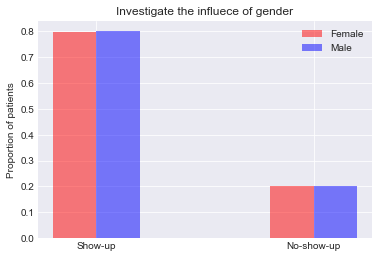

In [32]:
ind = np.arange(len(Female_proportions))  # the x locations for the groups
width = 0.2       # the width of the bars

# plot bars
red_bars = plt.bar(ind, Female_proportions, width, color='r', alpha=.5, label='Female')
blue_bars = plt.bar(ind + width, Male_proportions, width, color='b', alpha=.5, label='Male')

# title and labels
plt.ylabel('Proportion of patients')
plt.title('Investigate the influece of gender')
locations = ind + width / 2  # xtick locations
labels = ['Show-up', 'No-show-up']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

The show-up rate is 80% for female patients, and similar proportion is found for male patients. Therefore, gender has no influence on whether a patient will attend his/her medical appointment or not.

### Research Question 3: Are patients more willing to go to the appointment that is scheduled in the near future?

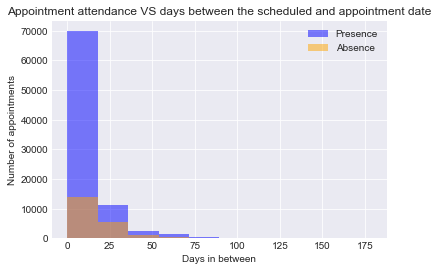

In [33]:
# Plot a histogram to show the distribution 
s1 = df_ma.DaysInBetween[presence]
s2 = df_ma.DaysInBetween[absence]
(n1, bins1, patches1) = plt.hist(s1, bins=10, alpha =0.5, color='blue', label='Presence')
(n2, bins2, patches2) = plt.hist(s2, bins=10, alpha =0.5, color='orange', label='Absence')
plt.legend()
plt.ylabel('Number of appointments')
plt.xlabel('Days in between')
plt.title('Appointment attendance VS days between the scheduled and appointment date');

In [34]:
# show the edges of each bin
if (bins1 == bins2).all():
    print(bins1)

[   0.    17.9   35.8   53.7   71.6   89.5  107.4  125.3  143.2  161.1
  179. ]


As we can see that most appointments have been scheduled in the next 0 to 18 days. A small portion of appointments require a waiting time of more than 36 days. I notice that the ratio between the presence and absence is smaller as the waiting time becomes longer. 

To make a more clear demonstration, a bar plot is created for the proportion of absence for the waiting time between 0 to 72 days.

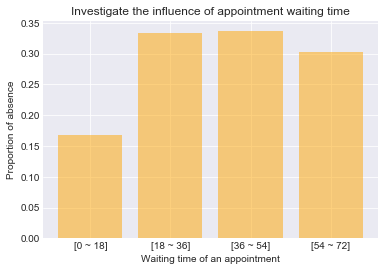

In [35]:
a1 = np.array(bins1[0:10])
a1 = a1.reshape(len(a1), 1)

a2 = np.array(bins2[1:11])
a2 = a2.reshape(len(a2), 1)

a3 = np.hstack((a1, a2))
a3 = np.ceil(a3)  # round up a number

binlist = []
for i in range(4):
    tmpstr = "[{} ~ {}]".format(str(int(a3[i][0])), str(int(a3[i][1])))
    binlist.append(tmpstr) 
    
heights = n2/(n1+n2)
heights = heights[0 : 4]

locations = [1,2,3,4]
labels = binlist
plt.bar(locations, heights, alpha =0.5, color='orange', tick_label=labels)
plt.ylabel('Proportion of absence')
plt.xlabel('Waiting time of an appointment')
plt.title('Investigate the influence of appointment waiting time');

The bar plot shows that the proportion of absence increase when the appointment waiting time is longer than 18 days. Therefore, the patients are more willing to go to the appointments which are scheduled in the near future. It is possible that the patient has recovered or chosen to go to another hospital if his waiting time is very long, so this patient didn't attend the original appointment.

### Research Question 4: Does SMS motivate patients to attend medical appointments?

In [36]:
# find the percentage of No-SMS
df_ma.SMS_received.value_counts()[0]/len(df_ma)

0.67673642592090633

In [37]:
# find the mean show-up rate for two groups of patients: SMS-received vs No-SMS
df_ma.groupby('SMS_received')['Show-up'].mean()

SMS_received
0    0.832712
1    0.723348
Name: Show-up, dtype: float64

In [38]:
# Calculate the show-up and no-show-up rates for two groups of patients
SMSreceived_counts = df_ma.groupby('SMS_received')['Show-up'].value_counts()
SMSreceived_totals = df_ma.groupby('SMS_received').count()['Show-up']

SMS_proportions = SMSreceived_counts[1] / SMSreceived_totals[1]
NoSMS_proportions = SMSreceived_counts[0] / SMSreceived_totals[0]

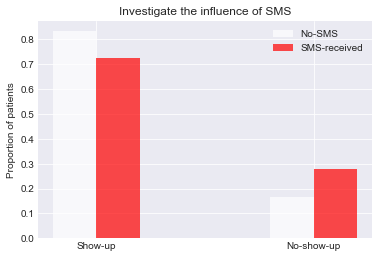

In [39]:
ind = np.arange(len(SMS_proportions))  # the x locations for the groups
width = 0.2       # the width of the bars

# plot bars
write_bars = plt.bar(ind, NoSMS_proportions, width, color='w', alpha=.7, label='No-SMS')
red_bars = plt.bar(ind + width, SMS_proportions, width, color='r', alpha=.7, label='SMS-received')

# title and labels
plt.ylabel('Proportion of patients')
plt.title('Investigate the influence of SMS')
locations = ind + width / 2  # xtick locations
labels = ['Show-up', 'No-show-up']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

The show-up rate is not higher for those patients who have received SMS reminder compared to the patients who haven't received reminder, which is a bit counterintuitive. However, it is reasonable that the patient will go to the appointment if he think it is important no matter he received the SMS reminder or not. From the current dataset, patient only recieve one SMS message if the hospital provides reminder survice. Motivation by only one SMS reminder is not engough.

### Research Question 5: Does patient have any preference on the day of week?

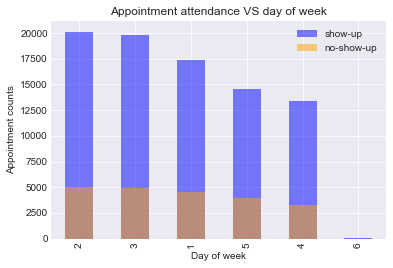

In [40]:
# plot a histogram to show the attendance of appointment at different day of week 
df_ma.AppointmentDFW[presence].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='show-up')
df_ma.AppointmentDFW[absence].value_counts().plot(kind='bar', alpha=0.5, color='orange', label='no-show-up')
plt.legend()
plt.ylabel('Appointment counts')
plt.xlabel('Day of week')
plt.title('Appointment attendance VS day of week');

Just to remind that the day of week representation is: 1=Monday, 2=Tuesday, ... 6=Sautrday. Most medical appointments are arranged on weekdays, and very few appointments are scheduled on weekends. It seems more patients attend their appointments scheduled on Tuesday and Wednesday than Thursday and Friday. 

To be more reliable, a bar plot of show-up proportion for weekdays is created.

In [41]:
presence_counts = df_ma.AppointmentDFW[presence].value_counts()
presence_counts

3    20142
2    19807
1    17388
5    14525
4    13415
6       30
Name: AppointmentDFW, dtype: int64

In [42]:
dayofweek_counts = df_ma['AppointmentDFW'].value_counts()
dayofweek_counts

3    25090
2    24831
1    21903
5    18465
4    16659
6       39
Name: AppointmentDFW, dtype: int64

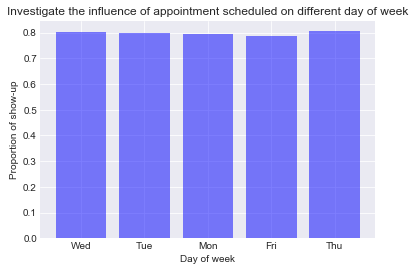

In [43]:
heights = presence_counts[0:5]/dayofweek_counts[0:5]

locations = [1, 2, 3, 4, 5]
labels = ['Wed', 'Tue', 'Mon', 'Fri', 'Thu']
plt.bar(locations, heights, alpha =0.5, color='blue', tick_label=labels)
plt.ylabel('Proportion of show-up')
plt.xlabel('Day of week')
plt.title('Investigate the influence of appointment scheduled on different day of week');

The show-up proportion is about 80% across from Monday to Friday. Therefore, patients have no preference to the day of week on which the appointment is arranged.

### Research Question 6: What is the difference between show-up rate for patient at different age?

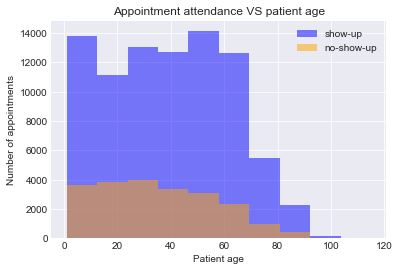

In [44]:
s1 = df_ma.Age[presence]
s2 = df_ma.Age[absence]
(n1, bins1, patches1) = plt.hist(s1, bins=10, alpha =0.5, color='blue', label='show-up')
(n2, bins2, patches2) = plt.hist(s2, bins=10, alpha =0.5, color='orange', label='no-show-up')
plt.legend()
plt.ylabel('Number of appointments')
plt.xlabel('Patient age')
plt.title('Appointment attendance VS patient age');

In [45]:
# show the edges of each bin
if (bins1 == bins2).all():
    print(bins1)

[   1.    12.4   23.8   35.2   46.6   58.    69.4   80.8   92.2  103.6
  115. ]


Most patients who attend the medical appointments are between 47 to 58 year old.

Let's further plot the bar plot of appointment show-up rate for all the common ages.

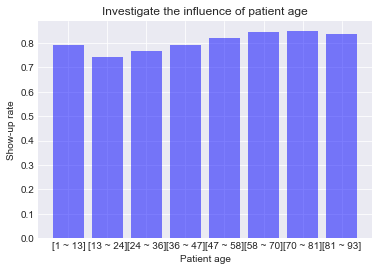

In [46]:
a1 = np.array(bins1[0:10])
a1 = a1.reshape(len(a1), 1)

a2 = np.array(bins2[1:11])
a2 = a2.reshape(len(a2), 1)

a3 = np.hstack((a1, a2))
a3 = np.ceil(a3)  # round up a number

binlist = []
for i in range(8):
    tmpstr = "[{} ~ {}]".format(str(int(a3[i][0])), str(int(a3[i][1])))
    binlist.append(tmpstr) 
    
heights = n1/(n1+n2)
heights = heights[0 : 8]

locations = [1,2,3,4,5,6,7,8]
labels = binlist
plt.bar(locations, heights, alpha =0.5, color='blue', tick_label=labels)
plt.ylabel('Show-up rate')
plt.xlabel('Patient age')
plt.title('Investigate the influence of patient age');

Elderly patients have higher show-up rate of medical appointments than young to middle-aged adult patients. This result may indicate that elderly patients are in higher need of medical treatments.

### Research Question 7: Does welfare play an important role on the attendance?

In [47]:
# find the mean Show-up rate for two groups of patient: welfare-received vs No-welfare
df_ma.groupby('Scholarship')['Show-up'].mean()

Scholarship
0    0.801316
1    0.762143
Name: Show-up, dtype: float64

In [48]:
# Calculate the show-up and no-show-up rates for two groups of patients
welfare_showup_counts = df_ma.groupby('Scholarship')['Show-up'].value_counts()
welfare_totals = df_ma.groupby('Scholarship').count()['Show-up']

welfare_proportions = welfare_showup_counts[1] / welfare_totals[1]
Nowelfare_proportions = welfare_showup_counts[0] / welfare_totals[0]

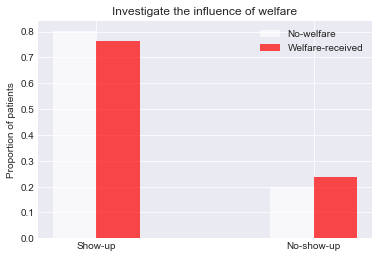

In [49]:
ind = np.arange(len(welfare_proportions))  # the x locations for the groups
width = 0.2       # the width of the bars

# plot bars
write_bars = plt.bar(ind, Nowelfare_proportions, width, color='w', alpha=.7, label='No-welfare')
red_bars = plt.bar(ind + width, welfare_proportions, width, color='r', alpha=.7, label='Welfare-received')

# title and labels
plt.ylabel('Proportion of patients')
plt.title('Investigate the influence of welfare')
locations = ind + width / 2  # xtick locations
labels = ['Show-up', 'No-show-up']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

The receiving of welfare doesn't lead to a higher appointment show-up rate, and the not receiving of welfare doesn't lead to a higher No-show-up rate either. Therefore, welfare doesn't play a critical role for the patients' attendance to medical appointments.

### Research Question 8: How is the health status for patients who did not show-up at medical appointments? 

In [50]:
# count the number of patients didn't show up for appointments
absence_count = len(df_ma[absence])
absence_count

21680

In [51]:
NoWel_absence_ratio = df_ma.Scholarship[absence].value_counts()[0]/absence_count
NoHipert_absence_ratio = df_ma.Hipertension[absence].value_counts()[0]/absence_count
NoDiab_absence_ratio = df_ma.Diabetes[absence].value_counts()[0]/absence_count
NoAlco_absence_ratio = df_ma.Alcoholism[absence].value_counts()[0]/absence_count
NoSMS_absence_ratio = df_ma.SMS_received[absence].value_counts()[0]/absence_count

In [52]:
Wel_absence_ratio = df_ma.Scholarship[absence].value_counts()[1]/absence_count
Hipert_absence_ratio = df_ma.Hipertension[absence].value_counts()[1]/absence_count
Diab_absence_ratio = df_ma.Diabetes[absence].value_counts()[1]/absence_count
Alco_absence_ratio = df_ma.Alcoholism[absence].value_counts()[1]/absence_count
SMS_absence_ratio = df_ma.SMS_received[absence].value_counts()[1]/absence_count

In [53]:
No_absence_ratios = [NoWel_absence_ratio, NoHipert_absence_ratio, NoDiab_absence_ratio, NoAlco_absence_ratio, NoSMS_absence_ratio]
Yes_absence_ratios = [Wel_absence_ratio, Hipert_absence_ratio, Diab_absence_ratio, Alco_absence_ratio, SMS_absence_ratio]

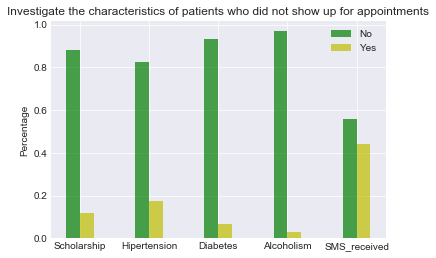

In [54]:
ind = np.arange(len(No_absence_ratios))  # the x locations for the groups
width = 0.2       # the width of the bars

# plot bars
green_bars = plt.bar(ind, No_absence_ratios, width, color='g', alpha=.7, label='No')
yellow_bars = plt.bar(ind + width, Yes_absence_ratios, width, color='y', alpha=.7, label='Yes')

# title and labels
plt.ylabel('Percentage')
plt.title('Investigate the characteristics of patients who did not show up for appointments')
locations = ind + width / 2  # xtick locations
labels = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

Among the patients who did not attend their medical appointments, most of them didn't receive welfare, most of them didn't have hipertension and diabetes, most of them are not alcoholic, more of them haven't received SMS reminder.

### Research Question 9: Where is the most popular neighborhood for attending medical appointments? 

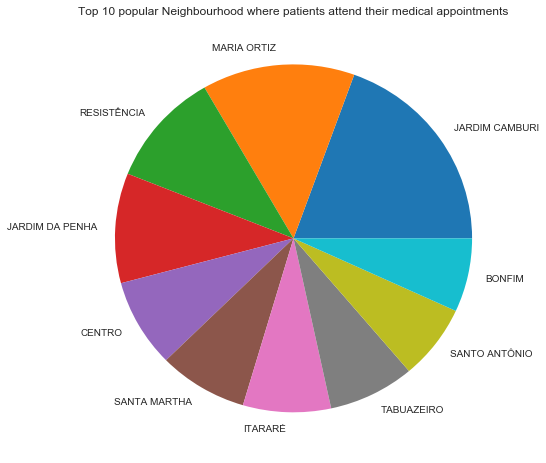

In [55]:
df_ma.Neighbourhood[presence].value_counts()[0:10].plot(kind='pie', figsize=(8, 8))
plt.title('Top 10 popular Neighbourhood where patients attend their medical appointments')
plt.ylabel("");

JARDIM CAMBURI is the most popular neighborhood where patients attend their medical appointments.

### Research Question 10: What is the record period of the dataset?

In [56]:
df_ma['ScheduledDate'].min()

Timestamp('2015-11-10 00:00:00')

In [57]:
df_ma['ScheduledDate'].max()

Timestamp('2016-06-08 00:00:00')

In [58]:
df_ma.shape

(106987, 14)

This dataset is recorded from November 2015 to June 2016, during which 106987 valid medical appointments were booked.

<a id='limitation'></a>
## Limitations

> While this report provides a lot of useful information that can be refered by hospitals to regulate medical appontments in future, there are some limitations. The current dataset has bias, for example, the cases of No-SMS is twice to the cases of SMS-received, so the true effectiveness of SMS reminder can not be judged under this circumstance. Similarly, this dataset is biased towards to no-Scholoship, no-Hipertension, no-Diabetes, and no-Alcoholism cases. The date and time are provided on the ScheduledDay but the time information is missing on the AppointmentDay. If appointment time is known, we can conclude at what time most patients are usually available (e.g. morning or afternoon). The reason for each medical appontment is not documented, we may want to know whether an appointment is for emergency, first visit, or follow-up visit; we may want to know whether a patient newly/suddenly develop a disease or he is a chronic patient needing to visit the doctor regularly. It would be more helpful to predict the attendance of patients if their visiting reasons are recorded. This dataset is only recorded in seven months (from November 2015 to June 2016), which less than a year. Data collected from 12 month can provide seasonal pattern of show-up/no-show-up for appointments. 


<a id='conclusions'></a>
## Conclusions

> On average, 80% of patients attend their medical appointments in Bazil, and JARDIM CAMBURI is the most popular neighborhood where most appointments are attended. Most of the time, appointments are possible to be scheduled in the next 0 to 18 days and be arranged on weekdays. 

> In the analysis of current dataset, Gender, SMS, day of week and Scholarship have not demonstrated important influence on whether the patient will attend an appoitment or not. However, the analysis shows patients are more willing to go to the appointment which is arranged in the near future. To increase the show-up rate, some actions may be good to be considered: 1) avoid to schedule long-term appointment (e.g. waiting time > 36 days) if unnecessary; 2) give options for patient to choose other neighborhoods, which might be further away from where the patient live but less busy; 3) send SMS reminders to a patient on different days respectively; 4) suggest patients to cancel their appointments if they do not need that any more, and introduce proper penalties if the patients fail to follow the booking rules. 
